# Fashion Object Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [5]:
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sweater", "Bag", "Ankle boot"]

In [7]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [8]:
X_train_n = X_train_full/255.
X_test_n = X_test/255.

In [9]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]
X_test = X_test_n

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='valid', activation='relu',
                             input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

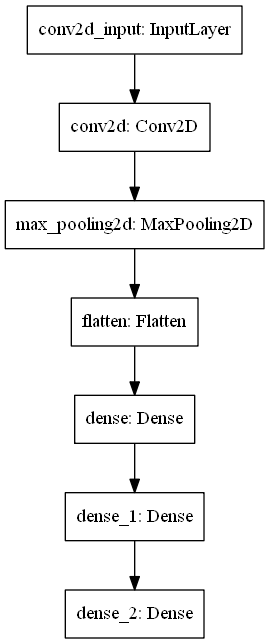

In [13]:
import pydot
keras.utils.plot_model(model)

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [15]:
model_history = model.fit(X_train, Y_train,
                         epochs=30, batch_size=64,
                         validation_data=(X_valid, Y_valid))

Epoch 1/30
860/860 [==============================] - 35s 41ms/step - loss: 0.8774 - accuracy: 0.6990 - val_loss: 0.7443 - val_accuracy: 0.7376
Epoch 2/30
860/860 [==============================] - 37s 43ms/step - loss: 0.5391 - accuracy: 0.8045 - val_loss: 0.4968 - val_accuracy: 0.8144
Epoch 3/30
860/860 [==============================] - 45s 52ms/step - loss: 0.4812 - accuracy: 0.8263 - val_loss: 0.9007 - val_accuracy: 0.7116
Epoch 4/30
860/860 [==============================] - 48s 56ms/step - loss: 0.4440 - accuracy: 0.8413 - val_loss: 0.4141 - val_accuracy: 0.8566
Epoch 5/30
860/860 [==============================] - 46s 54ms/step - loss: 0.4201 - accuracy: 0.8497 - val_loss: 0.4420 - val_accuracy: 0.8440
Epoch 6/30
860/860 [==============================] - 46s 54ms/step - loss: 0.3962 - accuracy: 0.8581 - val_loss: 0.3779 - val_accuracy: 0.8700
Epoch 7/30
860/860 [==============================] - 41s 48ms/step - loss: 0.3787 - accuracy: 0.8661 - val_loss: 0.4099 - val_accuracy:

In [16]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 860}

In [17]:
model_history.history

{'loss': [0.8774202466011047,
  0.5391242504119873,
  0.48124808073043823,
  0.44402021169662476,
  0.42010873556137085,
  0.39615771174430847,
  0.3787437975406647,
  0.363400936126709,
  0.34945055842399597,
  0.337227463722229,
  0.32507428526878357,
  0.31380122900009155,
  0.30683013796806335,
  0.29816967248916626,
  0.29008007049560547,
  0.2836661636829376,
  0.2758951783180237,
  0.27084216475486755,
  0.26441389322280884,
  0.25905337929725647,
  0.2529255151748657,
  0.24762827157974243,
  0.24241569638252258,
  0.2377203106880188,
  0.2329920083284378,
  0.22924990952014923,
  0.22515492141246796,
  0.22030332684516907,
  0.2153332680463791,
  0.21241095662117004],
 'accuracy': [0.6990000009536743,
  0.8045091032981873,
  0.8263454437255859,
  0.8413272500038147,
  0.8497454524040222,
  0.8581091165542603,
  0.8661272525787354,
  0.8696181774139404,
  0.8735818266868591,
  0.8783090710639954,
  0.881745457649231,
  0.8867818117141724,
  0.8887090682983398,
  0.8910545706748

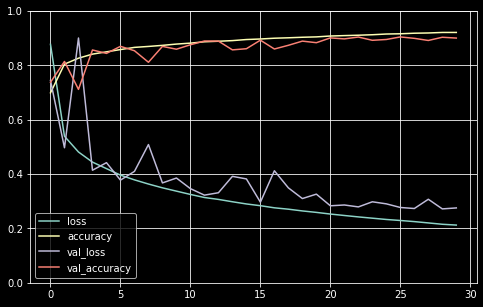

In [18]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [20]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2856 - accuracy: 0.8988


[0.2856121361255646, 0.8988000154495239]

In [23]:
x_new = X_test[:3]

In [24]:
y_pred = model.predict_classes(x_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
y_pred

array([9, 2, 1], dtype=int64)

In [26]:
np.argmax(model.predict(x_new), axis=-1)

array([9, 2, 1], dtype=int64)

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
Y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


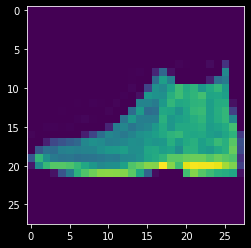

In [30]:
print(plt.imshow(X_test[0].reshape((28, 28))))

## Pooling and Without Pooling

In [31]:
del model

In [33]:
keras.backend.clear_session()

In [34]:
modela = keras.models.Sequential()
modela.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='valid', activation='relu',
                             input_shape=(28, 28, 1)))
modela.add(keras.layers.MaxPooling2D((2, 2)))

modela.add(keras.layers.Flatten())
modela.add(keras.layers.Dense(300, activation="relu"))
modela.add(keras.layers.Dense(100, activation="relu"))
modela.add(keras.layers.Dense(10, activation="softmax"))

In [37]:
modelb = keras.models.Sequential()
modelb.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='valid', activation='relu',
                             input_shape=(28, 28, 1)))

modelb.add(keras.layers.Flatten())
modelb.add(keras.layers.Dense(300, activation="relu"))
modelb.add(keras.layers.Dense(100, activation="relu"))
modelb.add(keras.layers.Dense(10, activation="softmax"))

In [35]:
modela.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [38]:
modelb.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [39]:
modela_history = modela.fit(X_train, Y_train,
                         epochs=10, batch_size=64,
                         validation_data=(X_valid, Y_valid))

Epoch 1/10
860/860 [==============================] - 28s 32ms/step - loss: 0.8468 - accuracy: 0.7084 - val_loss: 0.8046 - val_accuracy: 0.7044
Epoch 2/10
860/860 [==============================] - 27s 32ms/step - loss: 0.5358 - accuracy: 0.8062 - val_loss: 0.4992 - val_accuracy: 0.8080
Epoch 3/10
860/860 [==============================] - 29s 34ms/step - loss: 0.4790 - accuracy: 0.8269 - val_loss: 0.9725 - val_accuracy: 0.6954
Epoch 4/10
860/860 [==============================] - 30s 35ms/step - loss: 0.4426 - accuracy: 0.8420 - val_loss: 0.4150 - val_accuracy: 0.8558
Epoch 5/10
860/860 [==============================] - 28s 33ms/step - loss: 0.4189 - accuracy: 0.8493 - val_loss: 0.4326 - val_accuracy: 0.8464
Epoch 6/10
860/860 [==============================] - 29s 34ms/step - loss: 0.3955 - accuracy: 0.8578 - val_loss: 0.3784 - val_accuracy: 0.8678
Epoch 7/10
860/860 [==============================] - 30s 35ms/step - loss: 0.3781 - accuracy: 0.8652 - val_loss: 0.4063 - val_accuracy:

In [40]:
modelb_history = modelb.fit(X_train, Y_train,
                         epochs=10, batch_size=64,
                         validation_data=(X_valid, Y_valid))

Epoch 1/10
860/860 [==============================] - 48s 56ms/step - loss: 0.7403 - accuracy: 0.7455 - val_loss: 0.6989 - val_accuracy: 0.7572
Epoch 2/10
860/860 [==============================] - 51s 59ms/step - loss: 0.4956 - accuracy: 0.8213 - val_loss: 0.4629 - val_accuracy: 0.8246
Epoch 3/10
860/860 [==============================] - 49s 57ms/step - loss: 0.4433 - accuracy: 0.8393 - val_loss: 0.9842 - val_accuracy: 0.6924
Epoch 4/10
860/860 [==============================] - 54s 63ms/step - loss: 0.4099 - accuracy: 0.8520 - val_loss: 0.3891 - val_accuracy: 0.8624
Epoch 5/10
860/860 [==============================] - 54s 63ms/step - loss: 0.3883 - accuracy: 0.8595 - val_loss: 0.3870 - val_accuracy: 0.8602
Epoch 6/10
860/860 [==============================] - 49s 57ms/step - loss: 0.3669 - accuracy: 0.8666 - val_loss: 0.3679 - val_accuracy: 0.8678
Epoch 7/10
860/860 [==============================] - 51s 60ms/step - loss: 0.3532 - accuracy: 0.8715 - val_loss: 0.4019 - val_accuracy:

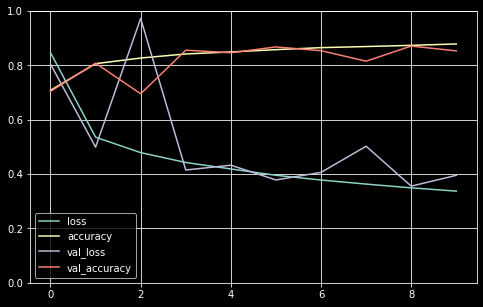

In [41]:
import pandas as pd

pd.DataFrame(modela_history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

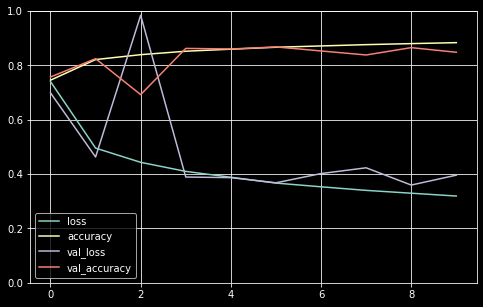

In [42]:
import pandas as pd

pd.DataFrame(modelb_history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [43]:
modela.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4307 - accuracy: 0.8360


[0.43065574765205383, 0.8360000252723694]

In [44]:
modelb.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.4440 - accuracy: 0.8333


[0.4440024793148041, 0.833299994468689]